# Dimension Reduction - PCA

## I. scikit-learn의 load digit 데이터를 이용한 PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### 1. load_digits의 데이터를 이용하여 데이터 프레임 생성 및 데이터 사이즈 확인

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [3]:
# load_digits의 데이터만 df 저장

df = digits.data

df

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
# 데이터 사이즈

print(df.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

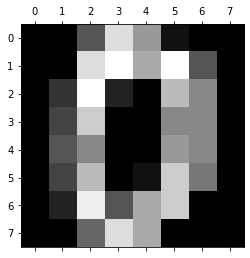

In [5]:
# 데이터 이미지 확인

plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [6]:
# 아주 큰 차이가 나지는 않지만 scale을 통해 표준화

scaler = StandardScaler()
scaler.fit(df)
x_scaled = scaler.transform(df)

In [7]:
x_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

### 2. 2개의 주성분을 이용하는 PCA 함수 생성

In [8]:
pca = PCA(n_components=2)
pca.fit(x_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### 3. 데이터 projection하기(fit_transform)

In [9]:
x_pca = pca.transform(x_scaled)

### 4. original 데이터와 fitting된 데이터의 사이즈 확인 및 비교

In [10]:
print('원본 데이터: {}'.format(str(x_scaled.shape)))
print('축소된 데이터: {}'.format(str(x_pca.shape)))

원본 데이터: (1797, 64)
축소된 데이터: (1797, 2)


### 5. 2D 그래프(X축 - PC1, Y축 - PC2) projection된 데이터를 10단계 색상 값으로 Plotting

* matplotlib pyplot의 scatter 이용
* 10단계의 색상 값은 cm_get_cmap('Spectral', 10) 사용

Text(0, 0.5, 'PC2')

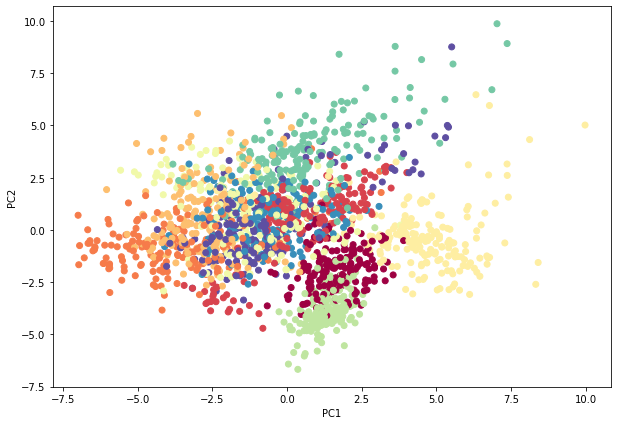

In [11]:
plt.figure(figsize=(10, 7))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=digits.target, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('PC1')
plt.ylabel('PC2')

### +) 1. PCA의 explained_variance_ratio_

In [12]:
pca = PCA().fit(x_scaled)

In [13]:
pca.explained_variance_ratio_

array([1.20339161e-01, 9.56105440e-02, 8.44441489e-02, 6.49840791e-02,
       4.86015488e-02, 4.21411987e-02, 3.94208280e-02, 3.38938092e-02,
       2.99822101e-02, 2.93200255e-02, 2.78180546e-02, 2.57705509e-02,
       2.27530332e-02, 2.22717974e-02, 2.16522943e-02, 1.91416661e-02,
       1.77554709e-02, 1.63806927e-02, 1.59646017e-02, 1.48919119e-02,
       1.34796957e-02, 1.27193137e-02, 1.16583735e-02, 1.05764660e-02,
       9.75315947e-03, 9.44558990e-03, 8.63013827e-03, 8.36642854e-03,
       7.97693248e-03, 7.46471371e-03, 7.25582151e-03, 6.91911245e-03,
       6.53908536e-03, 6.40792574e-03, 5.91384112e-03, 5.71162405e-03,
       5.23636803e-03, 4.81807586e-03, 4.53719260e-03, 4.23162753e-03,
       4.06053070e-03, 3.97084808e-03, 3.56493303e-03, 3.40787181e-03,
       3.27835335e-03, 3.11032007e-03, 2.88575294e-03, 2.76489264e-03,
       2.59174941e-03, 2.34483006e-03, 2.18256858e-03, 2.03597635e-03,
       1.95512426e-03, 1.83318499e-03, 1.67946387e-03, 1.61236062e-03,
      

### +) 2. PCA의 components_

In [14]:
pca.components_

array([[ 1.21482737e-18, -1.82233917e-01, -2.85867997e-01, ...,
        -1.03198001e-01, -1.19810604e-01, -7.14936163e-02],
       [-7.62433540e-19,  4.70270076e-02,  5.95647953e-02, ...,
        -2.42617777e-01, -1.65089262e-01, -7.13292370e-02],
       [-3.56880226e-18,  2.35882143e-02, -5.67987457e-02, ...,
        -2.22795243e-02,  1.00365586e-01,  9.24458865e-02],
       ...,
       [-0.00000000e+00, -1.31269256e-17,  1.50859198e-17, ...,
         2.00803916e-16, -7.66929059e-17, -9.22121097e-17],
       [-0.00000000e+00, -3.44896455e-18,  1.14108678e-17, ...,
         2.22291295e-17, -8.53811450e-17,  9.04501300e-17],
       [ 1.00000000e+00, -2.83190998e-18,  5.03596636e-18, ...,
         9.44646642e-18, -1.19101943e-17,  1.39873617e-18]])

### +) 3. cumulative explained variance를 구하고 2D 그래프 Plotting

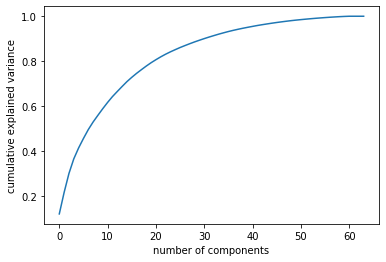

In [15]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## II. I의 결과 바탕으로 PCA image compress 실행

In [16]:
# plotdigit() 함수 선언
    
# plotdigit 함수 정의에 따른 사용시 유의사항
# plotdigit의 변수로 사용하는 것이 data의 내용값이어야 하기 때문에 
# 이 과제에서 loag_digits()을 통해 불러들인 데이터를 digit = load_digits()라고 정의한다면, plotdigit()은 plotdigit(digit.data)와 같이 함수를 적용해야함

def plotdigit(data):
    fig, axes = plt.subplots(4, 10, figsize=(20, 8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest',clim=(0, 16))

### 1. plotdigit() 함수를 이용하여 이미지 데이터 출력

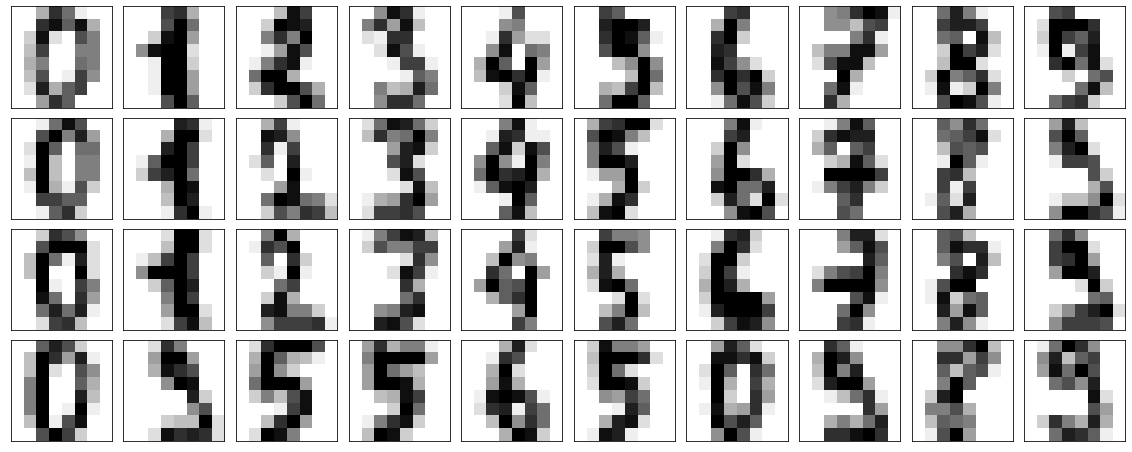

In [17]:
plotdigit(df)

### 2. np.random.seed() 함수 사용, 초기값 100 설정하여 난수 생성

In [18]:
np.random.seed(100)

### 3. np.random.normal() 함수 이용, std값 4의 노이즈 생성

In [19]:
# np.random.normal 함수를 통해 특정한 평균, 표준편차를 따르는 Sampling

noise = np.random.normal(0, 4, df.shape)   # sample 수는 df.shape 만큼 생성
df_noise = df + noise

### 4. noise 포함된 이미지 데이터 plotdigit() 함수 이용 출력

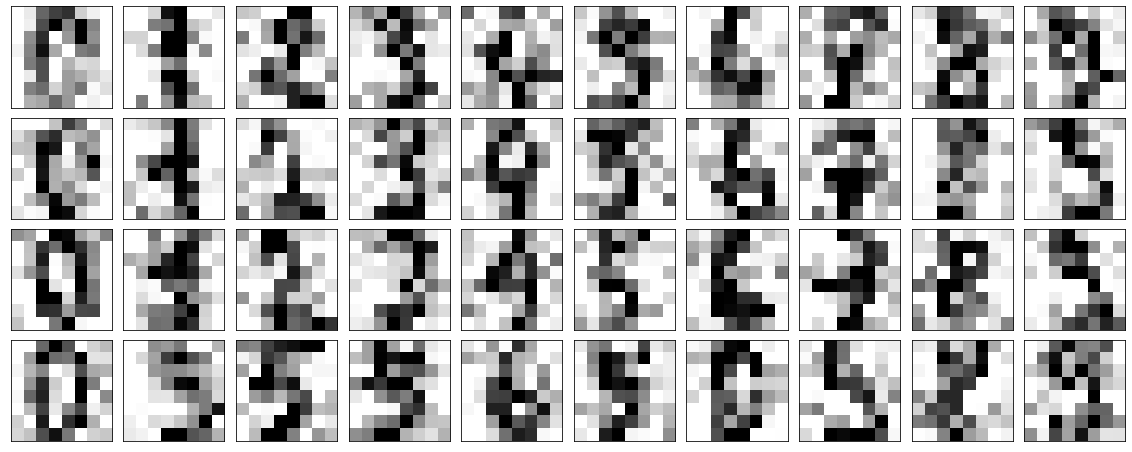

In [20]:
plotdigit(df_noise)

### 5. noise 값에 0.5 PC 적용한 PCA 생성

In [21]:
pca = PCA(n_components=0.5)
pca

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### 6. fit_transform() 이용 데이터 fitting

In [22]:
x_noise_pca = pca.fit_transform(df_noise)
x_noise_pca

array([[ -2.4053684 ,  12.59551113, -13.37096754, ...,  -8.35780178,
          4.60581933,  -7.51904459],
       [  1.31016242, -26.99351747,   4.25368472, ...,  -2.60187907,
         -1.2613783 ,  -5.73155436],
       [  7.31155671, -10.92661577,   0.083498  , ...,  -9.4440977 ,
          2.47760683,  -5.25223383],
       ...,
       [ 12.52302527, -14.52083086,   0.62155275, ...,   6.24180127,
          9.49459609,   5.44512492],
       [ -5.0409235 ,  13.68340264,  -9.25388228, ...,  13.62291169,
          4.89680013,  -5.96548299],
       [  4.31771021,  10.92367149,  10.53181202, ...,  10.27623924,
          6.91686395,   8.45527205]])

In [23]:
print('원본 데이터: {}'.format(str(x_scaled.shape)))
print('축소된 데이터: {}'.format(str(x_noise_pca.shape)))

원본 데이터: (1797, 64)
축소된 데이터: (1797, 12)


### 7. inverse_transform() 이용 데이터 복원

In [24]:
x_T = pca.inverse_transform(x_noise_pca)

In [25]:
# 복원된 데이터

x_T.shape

(1797, 64)

### 8. noise 적용된 복원 이미지 데이터 plotdigit() 함수 이용 출력

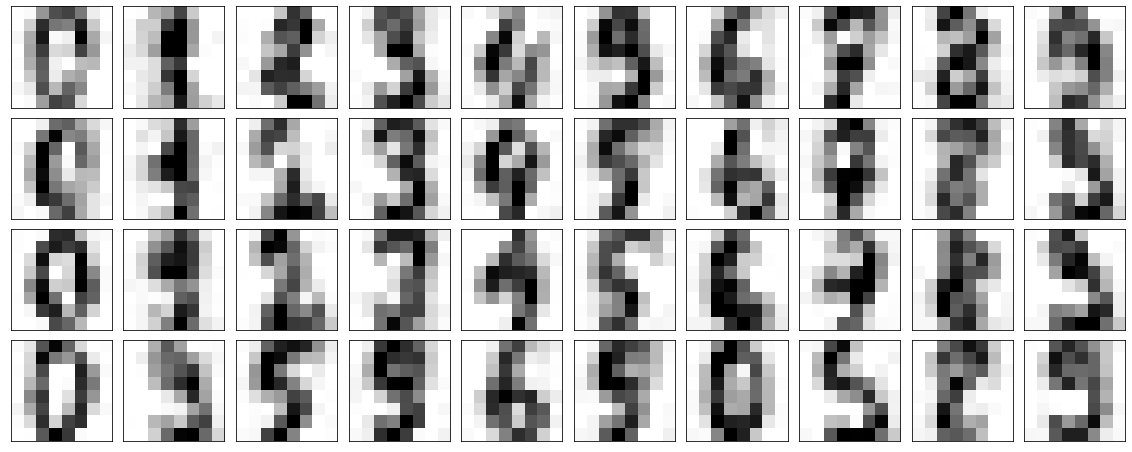

In [26]:
plotdigit(x_T)